In [192]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math
import sympy

import scipy
from scipy.fftpack import fft #дискретное преобразрвание Фурье 
from scipy.fftpack import ifft #обратное преобразрвание Фурье 

# Задание 1 а:) 

In [193]:
A = 2
N=600
fmax = 1000
T = 1/fmax
N*T

0.6

In [194]:
def kernel(t):
    return A*np.exp(-t**2)    #x(t)

def f(t):
    return A*np.sign(math.tan(np.pi*t/T))

def f_linear(t):
    return -2*t+10   #kernel too

In [195]:
f1 = 5
T = 2

In [196]:
x = np.linspace(-10,10,1000)
xf = np.linspace(0.0,fmax/2,N//2)

x_kernel = np.linspace(-10,10,300)
x1 = np.fft.fftshift(np.fft.fftfreq(x.shape[-1], x[1]-x[0]))

y = [f(t) for t in x] 

#kernels
y_k = [kernel(t) for t in x_kernel] 
y_linear = [f_linear(t) for t in x_kernel]


y_fft = fft([f(t) for t in x1])
y_fft_k = fft([kernel(t) for t in x1])

In [197]:
x.shape

(1000,)

In [198]:
x1.shape

(1000,)

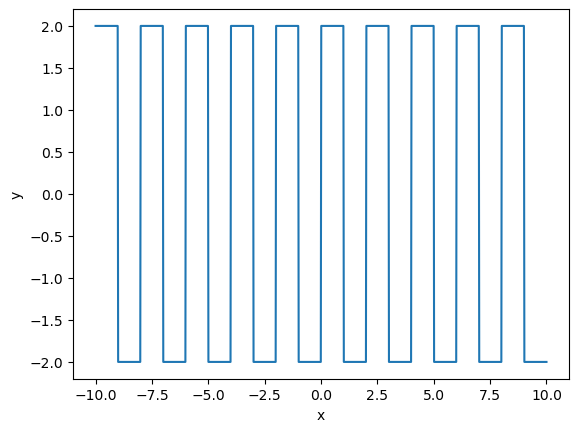

In [199]:
plt.plot(x, y)   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

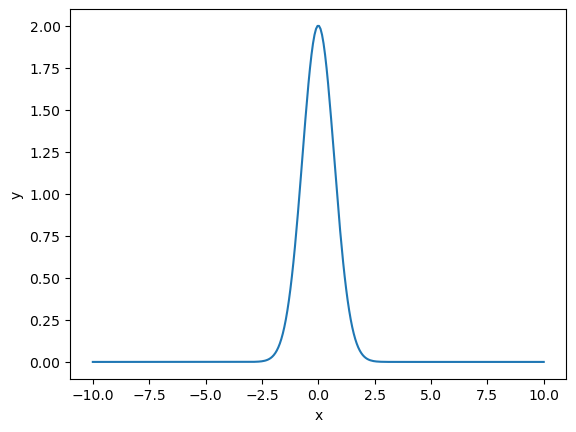

In [200]:
plt.plot(x_kernel, y_k)   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [201]:
y_conv = np.convolve(y_k,y, mode = 'same')
len(y)
len(y_k)

300

In [202]:
len(y_conv)

1000

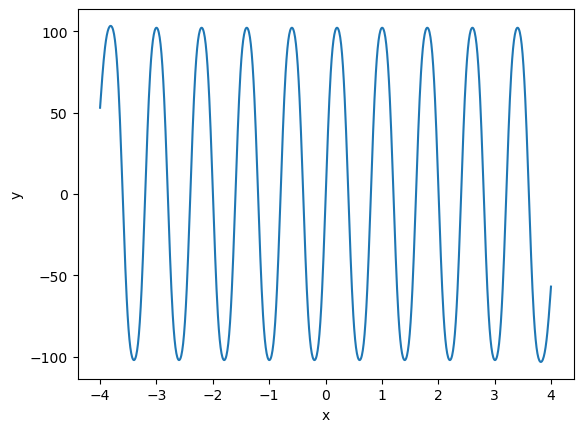

In [203]:
x1 = np.linspace(-4,4,1000)

plt.plot(x1,(y_conv))   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# задание 1 б;) 

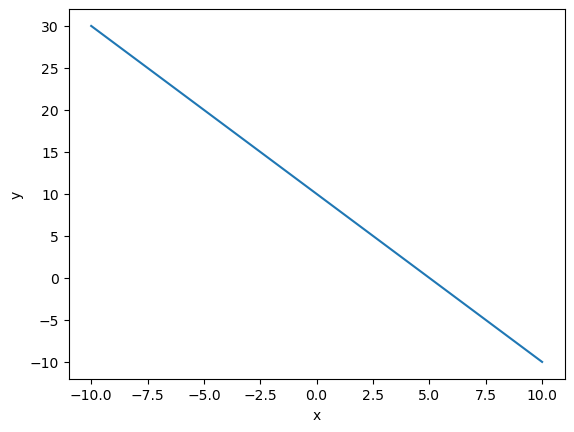

In [204]:
plt.plot(x_kernel, y_linear)   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [205]:
y_conv = np.convolve(y_linear,y, mode = 'same')

In [206]:
len(y_linear)
len(y_conv)

1000

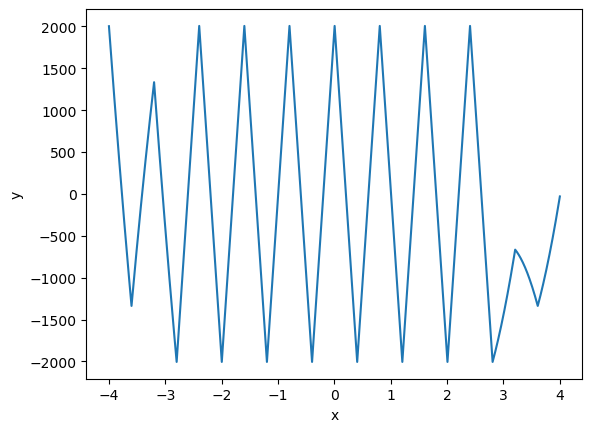

In [207]:
x1 = np.linspace(-4,4,1000)

plt.plot(x1, (y_conv))   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# задание 3

свертка во временной области 

In [234]:
y_conv = np.convolve(y_k,y, mode = 'valid')

In [235]:
y_conv.shape

(701,)

In [236]:
x = np.linspace(-4,4,701)

In [237]:
x.shape

(701,)

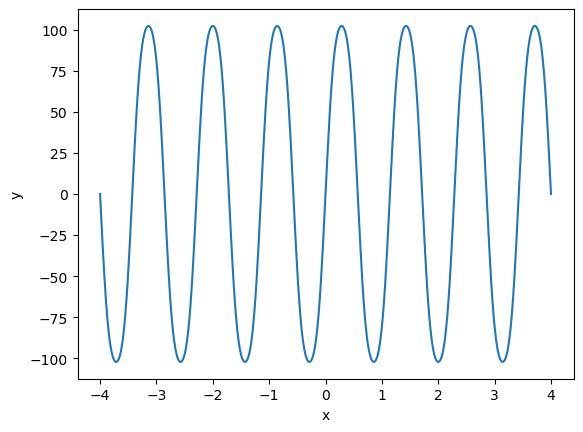

In [238]:
plt.plot(x,(y_conv))   
plt.xlabel('x')
plt.ylabel('y')
plt.show()


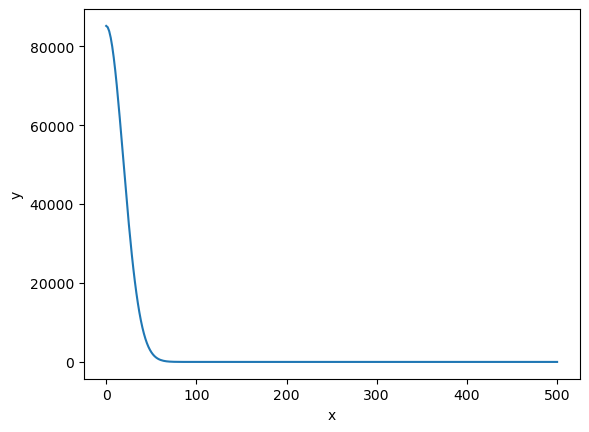

In [213]:
plt.plot(xf,2.0*N*np.abs(y_fft_k)[0:N//2])   # fft of kernel
plt.xlabel('x')
plt.ylabel('y')
plt.show()

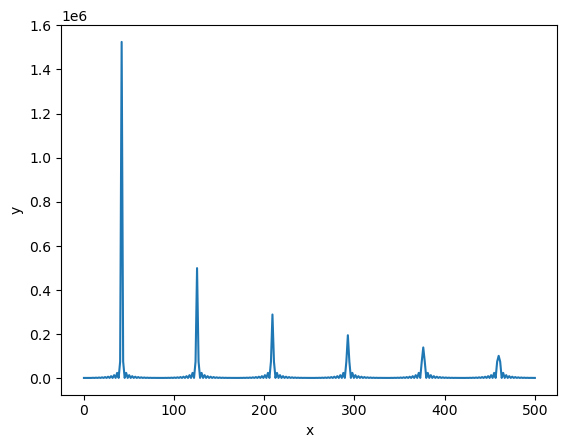

In [214]:
plt.plot(xf, 2.0*N*np.abs(y_fft)[0:N//2]) 
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [215]:
y_mult = y_fft*y_fft_k

In [216]:
#y_mult = (2.0*N*np.abs(y_fft)[0:N//2])*(2.0*N*np.abs(y_fft_k)[0:N//2])

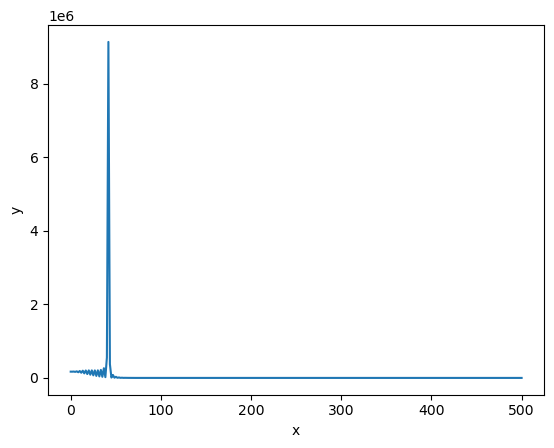

In [217]:
plt.plot(xf, 2.0*N*np.abs(y_mult)[0:N//2])   #frequancy-domain
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [218]:
ifft(y_mult).shape

(1000,)

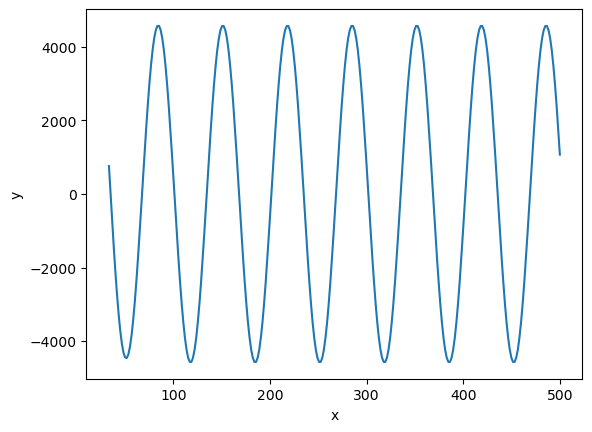

In [242]:
plt.plot(xf[20::], (1/2.0*N*(ifft(y_mult))[20:N//2]) )  #frequancy-domain
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Задание 4

COS 150 гц

In [158]:
h = x1
p= 0
s = 1
w= 2.35*s
fmax = 1000
T = 1.0/fmax   #  f = 100

In [159]:
x = np.linspace(-10,10,1000)#временной
xf = np.linspace(0.0,fmax/2,N//2)#частотный 
x1 = np.fft.fftshift(np.fft.fftfreq(x.shape[-1], x[1]-x[0]))

In [160]:
def kernel_Gausse(t):
    return np.exp(-0.5*((t-p)/s)**2)    #x(t)


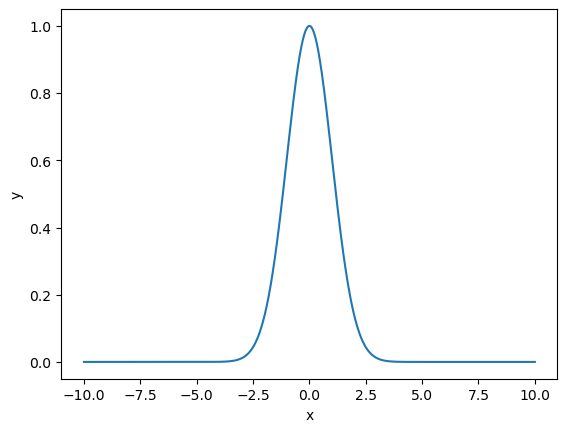

In [161]:
plt.plot(x, kernel_Gausse(x))   #time-domain
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [162]:
def f_cos(t, fn):
    return np.cos(fn*t*2.0*np.pi)       #x(t)


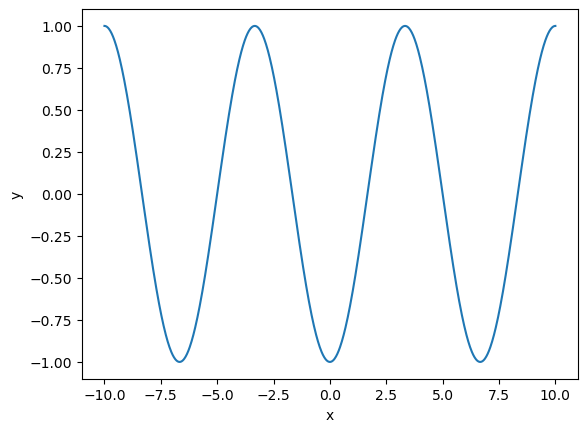

In [163]:
plt.plot(x, f_cos(x, 150))   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

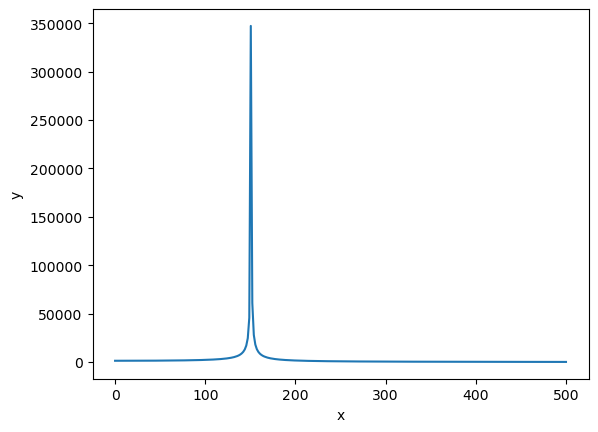

In [164]:
x=np.linspace(0.0,N*T,N)
fun1 = np.cos(150*x*2.0*np.pi)

plt.plot(xf, 2.0*N*np.abs(fft(fun1)[0:N//2])) 
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [169]:
x = np.linspace(-10,10,1000)#временной

In [170]:
y_conv_cos = np.convolve(f_cos(x, 150),kernel_Gausse(x), mode = 'same')# for time-domain
y_conv_cos.shape

(1000,)

freq of conv

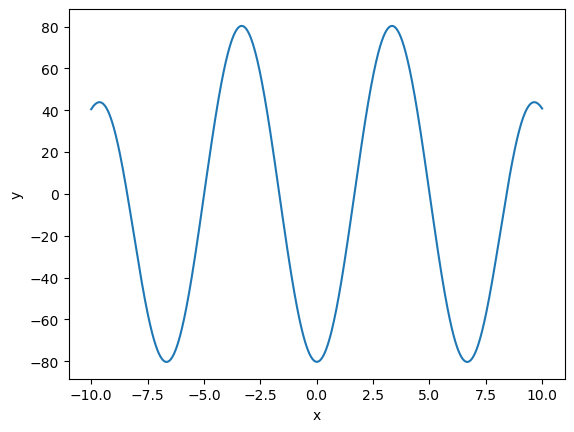

In [172]:
plt.plot(x, (y_conv_cos))   #time-domain
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [173]:
x = np.linspace(-10,10,1000)#временной
x1 = np.fft.fftshift(np.fft.fftfreq(x.shape[-1], x[1]-x[0]))
ft_g = fft(kernel_Gausse(x))
ft = fft(np.cos(150*x*2.0*np.pi))

In [174]:
y_freq_cos = ft*ft_g# freq-domain

In [175]:
y_freq_cos.shape

(1000,)

In [176]:
x1.shape

(1000,)

In [177]:
xf.shape

(300,)

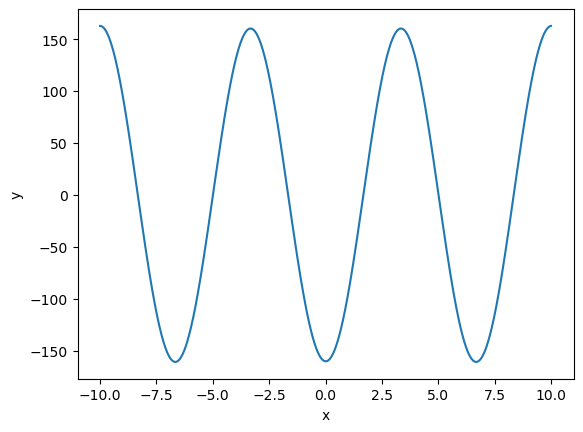

In [178]:
plt.plot(x, (2.0*ifft(abs(y_freq_cos)) ))   #freq-domain

plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 6

In [179]:
ep = 0.4
N = 600
ep

0.4

In [180]:
def win_Plank(t):
    za = ep*(N-1)*((1/t)+1/(t-ep*(N-1))) 
    zb = ep*(N-1)*(1/(N-1-t)+1/((1-ep)*(N-1)-t))
    if t == 0:
        return 0
    if t>0 and t<ep*(N-1):
        return 1/(np.exp(za)+1)
    if t>=ep*(N-1) and t<=(1-ep)*(N-1):
        return 1
    
    if t > (1-ep)*(N-1) and t < N-1:
        return 1/(np.exp(zb)+1)
    if t==N-1:
        return 0

In [181]:
x_kernel=np.linspace(0,N-1,N)
#x_kernel = np.linspace(-10,10,100)

y_k = [win_Plank(t) for t in x_kernel] 

C:\Users\79039\AppData\Local\Temp\ipykernel_16620\2067690948.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  za = ep*(N-1)*((1/t)+1/(t-ep*(N-1)))
C:\Users\79039\AppData\Local\Temp\ipykernel_16620\2067690948.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  zb = ep*(N-1)*(1/(N-1-t)+1/((1-ep)*(N-1)-t))


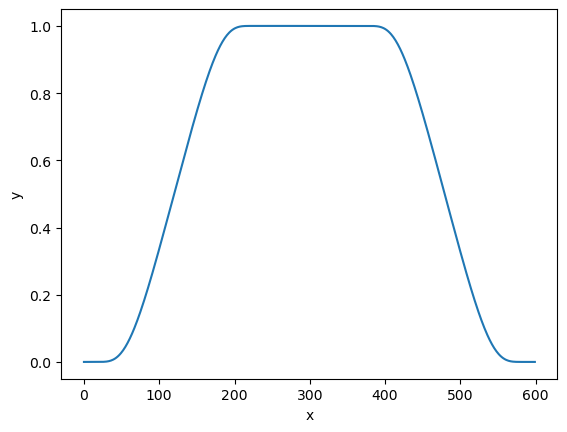

In [182]:
plt.plot(x_kernel, y_k)   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 7

In [183]:
x = np.linspace(-10,10,1000)#временной

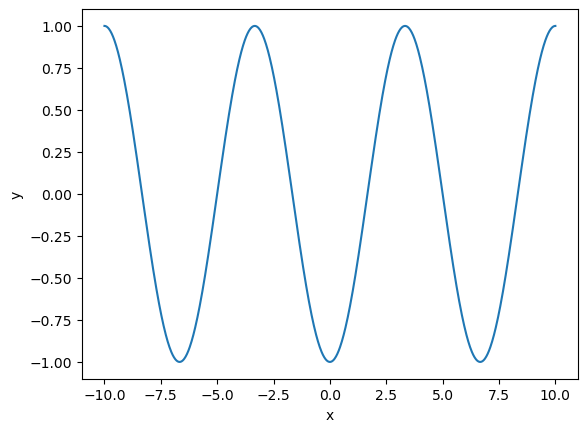

In [184]:
plt.plot(x, f_cos(x, 150))   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [185]:
noise = np.random.normal(0,1,x.shape) # значения белого шума


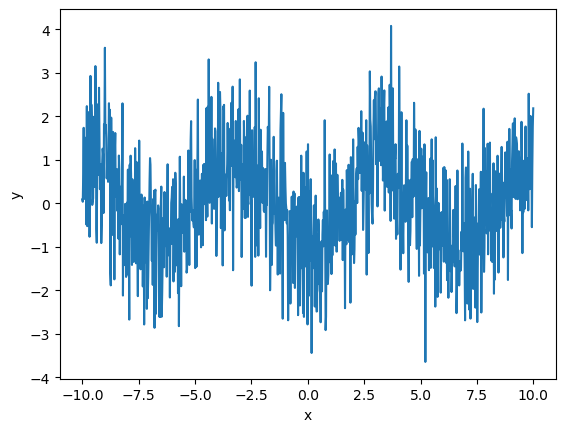

In [186]:
plt.plot(x, f_cos(x, 150)+noise)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [187]:
y_conv = np.convolve(f_cos(x, 150)+noise,y_k, mode = 'same')

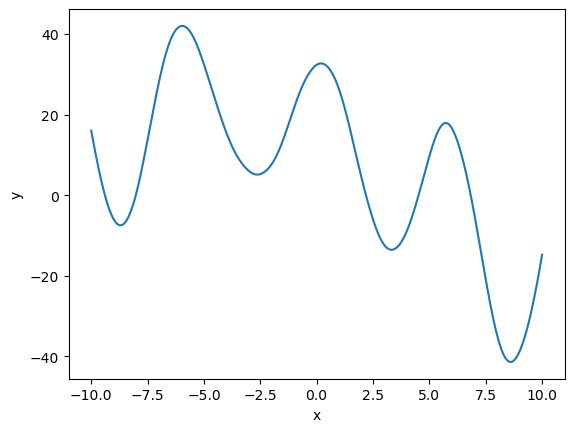

In [188]:
plt.plot(x,(y_conv))   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [189]:
x = np.linspace(-10,10,1000)#временной

In [190]:
y_conv = np.convolve(f_cos(x, 150)+noise,kernel_Gausse(x), mode = 'same')

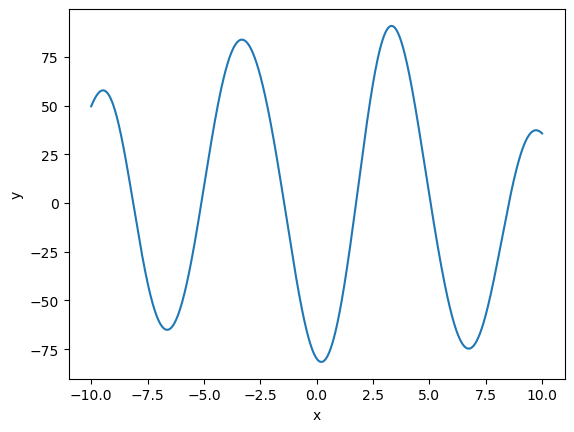

In [191]:
plt.plot(x,(y_conv))   
plt.xlabel('x')
plt.ylabel('y')
plt.show()